In [5]:
from __future__ import division
from scipy.integrate import odeint
import numpy as np
import pylab as plt
from scipy.linalg import eig,logm
%matplotlib inline
from scipy.optimize import curve_fit
import aes as aes
import floquet as fl
import warnings
warnings.filterwarnings('ignore')

0
1
2
3
4
5
6
7
8
9


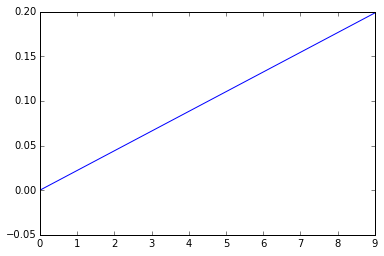

In [58]:
w0 = 1
wd = 2.1*w0
c_1 = 0*w0
c_0 = 0.5*w0
g = .3*w0
ca1, cq1 = (4/wd**2)*(w0**2-g**2/4+c_0-2*g), -(2/wd**2)*c_1
ca2, cq2 = (4/wd**2)*(w0**2-g**2/4-c_0-2*g), (2/wd**2)*c_1
nu1, nu2 = fl.mathieu_nu(ca1, cq1), fl.mathieu_nu(ca2, cq2)
#A1, 0A2 = fl.mathieu_coefs(ca1, cq1, nu1), fl.mathieu_coefs(ca2, cq2, nu2)
i = 2
#A1, A2 = A1[A1.size//2-i:A1.size//2+i+1], A2[A2.size//2-i:A2.size//2+i+1]
t = np.linspace(0,5, 30)
#
#
wc = 50
#T = 50
T1, T2 = 20, 25
#
c = c_0+c_1*np.cos(2*t)
V = w0**2-2*g
calor = np.array([])
temps = np.arange(0, 10, 1)
for T in temps:
    x1x1, x2x2, x1x2, x1p1, x2p2, x1p2, x2p1, p1p1, p2p2, p1p2 = aes.cov(t, g, ca1, cq1, ca2, cq2, 20, 20+T, wc, i, unpacked=True)
    Mcov = np.array([[x1x1, x1p1, x1x2, x1p2], [x1p1, p1p1, x2p1, p1p2], [x1x2, x2p1, x2x2, x2p2], [x1p2, p1p2, x2p2, p2p2]])
    heat1, heat2 = aes.heat(t, Mcov, c, V)  
    calor = np.append(calor, np.median(heat1))
    print T
plt.plot(temps, calor)


[0, 4.7619047619047619, -1, 1]

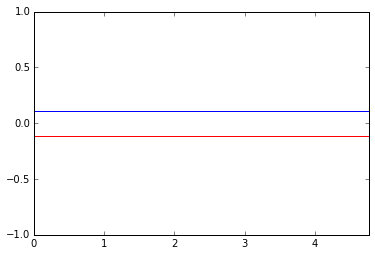

In [53]:
#plt.plot(t, heat1, 'bo', t, heat2, 'ro')
plt.plot(t, np.ones(len(t))*np.median(heat1), 'b', t, np.ones(len(t))*np.median(heat2), 'r')
plt.axis([0, np.max(t), -1, 1])

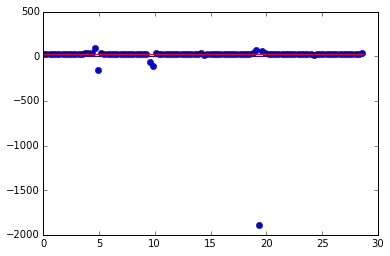

In [45]:
plt.plot(t, p1p1, 'o')
plt.plot(t, np.ones(len(t))*np.median(p1p1), 'r')
plt.plot(t, np.ones(len(t))*np.average(p1p1), 'b')
plt.axis([0, 30, -30, 30])
def func(x, a, c, d):
    return a * np.cos(wd * x + d) + c


xdata = t
ydata = p1p1
popt, pcov = curve_fit(func, xdata, ydata)

plt.plot(xdata, ydata, 'bo')
plt.plot(xdata, func(xdata, popt[0], popt[1], popt[2]), '-r')


In [56]:
np.arange(0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])